In [7]:
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

1. a)

In [4]:
df = pd.read_csv('BostonHousing.csv')
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


1. b)


In [5]:
with pm.Model() as model:
    beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
    beta_1 = pm.Normal('beta_1', mu=0, sigma=10)
    beta_2 = pm.Normal('beta_2', mu=0, sigma=10)

    medv_prob = pm.invlogit(beta_0 + beta_1 * df['rm'] + beta_2 * df['crim'] + beta_2 * df['indus'])
    medv = pm.Normal('medv', mu=medv_prob, observed=df['medv'])

with model:
    trace = pm.sample(1000, tune=1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_0, beta_1, beta_2]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1381 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


1. c)


         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
beta_0  1.758  9.582   -16.261     20.180      0.514    0.364     347.0   
beta_1  7.829  6.229    -1.663     20.506      0.434    0.307     220.0   
beta_2  7.773  6.119    -0.610     19.571      0.412    0.292     227.0   

        ess_tail  r_hat  
beta_0     477.0   1.00  
beta_1     411.0   1.00  
beta_2     410.0   1.01  


array([[<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta_1'}>,
        <Axes: title={'center': 'beta_1'}>],
       [<Axes: title={'center': 'beta_2'}>,
        <Axes: title={'center': 'beta_2'}>]], dtype=object)

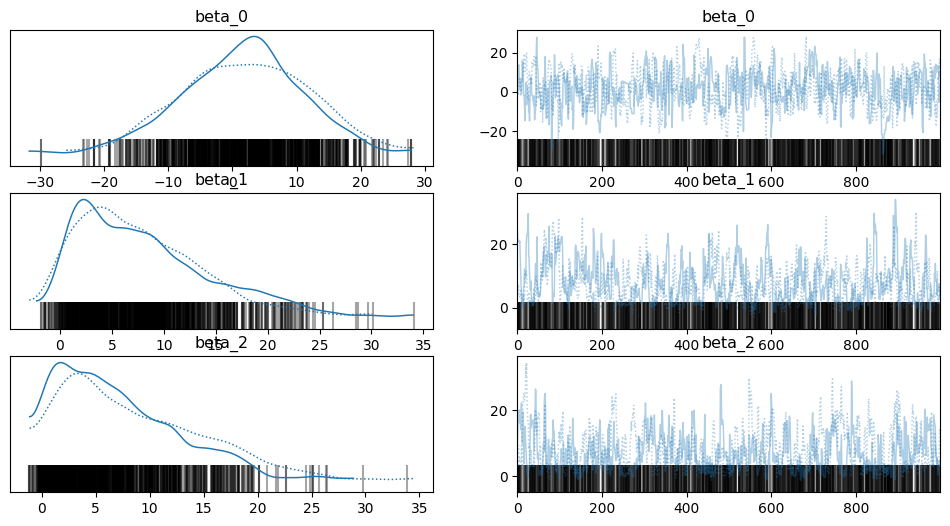

In [9]:
summary = az.summary(trace, hdi_prob=0.95)
print(summary)
az.plot_trace(trace)

1. d)


In [29]:
posterior = trace.posterior.stack(sample=("chain", "draw"))
az.plot_posterior(posterior, hdi_prob=0.5)

C:\Users\mborf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (6000) in plot_posterior, generating only 40 plots
  warnings.warn(
C:\Users\mborf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'beta_0\n(0, 0)'}>,
        <Axes: title={'center': 'beta_0\n(0, 1)'}>,
        <Axes: title={'center': 'beta_0\n(0, 2)'}>,
        <Axes: title={'center': 'beta_0\n(0, 3)'}>],
       [<Axes: title={'center': 'beta_0\n(0, 4)'}>,
        <Axes: title={'center': 'beta_0\n(0, 5)'}>,
        <Axes: title={'center': 'beta_0\n(0, 6)'}>,
        <Axes: title={'center': 'beta_0\n(0, 7)'}>],
       [<Axes: title={'center': 'beta_0\n(0, 8)'}>,
        <Axes: title={'center': 'beta_0\n(0, 9)'}>,
        <Axes: title={'center': 'beta_0\n(0, 10)'}>,
        <Axes: title={'center': 'beta_0\n(0, 11)'}>],
       [<Axes: title={'center': 'beta_0\n(0, 12)'}>,
        <Axes: title={'center': 'beta_0\n(0, 13)'}>,
        <Axes: title={'center': 'beta_0\n(0, 14)'}>,
        <Axes: title={'center': 'beta_0\n(0, 15)'}>],
       [<Axes: title={'center': 'beta_0\n(0, 16)'}>,
        <Axes: title={'center': 'beta_0\n(0, 17)'}>,
        <Axes: title={'center': 'beta_0\n(0, 18)'}>,

ValueError: Image size of 2354x131842 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2944x5520 with 40 Axes>

2. a)


Grid points: [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
Posterior probabilities: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]


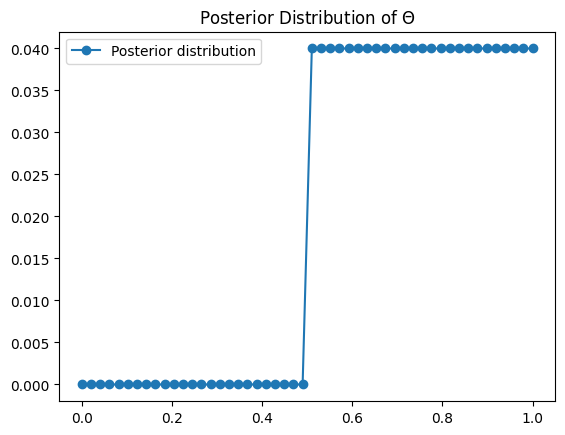

In [61]:
import scipy.stats as stats

def posterior_grid(grid_points=50, heads=6, tails=9):
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1/grid_points, grid_points)
    
    likelihood = np.where(grid <= 1/2, 0, 1)
    
    likelihood[:heads] = 0  
    
    posterior = likelihood * prior
    posterior /= posterior.sum()
    
    return grid, posterior

# Example usage:
grid, posterior = posterior_grid()
print("Grid points:", grid)
print("Posterior probabilities:", posterior)
plt.plot(grid, posterior, '-o', label='Posterior distribution')
plt.title('Posterior Distribution of $\Theta$')
plt.legend()
plt.show()

2. b)